In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 18
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+6,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 5,
                #'lines.marker':'o', 
                #'lines.markersize':4

             }
plt.rcParams.update(parameters)

In [2]:
#stages = 4
#shape = (stages, stages)
#L = np.zeros(shape)

L = np.array([
    [0,   0,       0,   25*0.8*1/4], 
    [0.8, 0.8*5/6, 0,   0], 
    [0,   0.8/6,   0,   0], 
    [0,   0,       0.8, 0.8*3/4]
])

In [3]:
# getting eigen vals + vects
eig_res = np.linalg.eig(L) # calculate eigenvalues and eigenvectors and the result is a tuple of np.arrays
lams, vecs = eig_res # extract the arrays into variables

# getting only the dominatingeigen vals + corresponding eigrn vect.
id_max = max(enumerate([abs(x) for x in lams]), key=lambda x: x[1])[0] #gives index of max eigenvalue
lam_dom, vec_dom = lams[id_max], vecs[:, id_max]

#defining max growth-rate
r = np.log(lam_dom)
# vec_dom = vecs[:, 3] # not needed, same as vecs[:, id_max] above

In [4]:
def time_series(n0, t_end=10):
    ret = np.zeros((t_end, len(lams)))
    n = n0
    ret[0] = n0
    for t in range(1, t_end):
        n = np.matmul(L, n)
        ret[t] = n
    return ret

In [5]:
# Fix time:
t_end = 40 # how many steps
t = np.arange(t_end) # make array with 40 steps
xx_ticks = np.linspace(0, 40, 21) # for plot: make array with numbers up to 40, but with 21 steps to use for x axis tick marks
xx_labels = [int(i/2) for i in xx_ticks] # for plot: make the labels for the x axis ticks

state_init = np.array([100, 0, 0, 0]) # set initial number of individuals for the 4 stages
sim_res = time_series(state_init, t_end=t_end) # solve the function 
# eggs, larv, pupa, bug = sim_res.T
pop = np.sum(sim_res, axis=1) # find total population: add the number of individuals from all stages
growth = pop[1:]/pop[:-1] # find growth rate: divide the sum of individuals from one timestep to the next
proportions = np.array([s/np.sum(s) for s in sim_res]) # find the proportions of each stage at each step

In [6]:
print(eig_res)
print(np.shape(lams))
print(lams)
print(np.shape(vecs))
print(vecs)
print(id_max)
print(lam_dom)
print(vec_dom)
print(lam_dom, r)
print(pop)
print(growth)
print(proportions)
print(t)
print(xx_ticks)
print(xx_labels)

(array([-0.55151171+0.j        ,  0.31639741+0.74332683j,
        0.31639741-0.74332683j,  1.18538356+0.j        ]), array([[ 0.8251643 +0.j        , -0.70714939+0.j        ,
        -0.70714939-0.j        ,  0.53722406+0.j        ],
       [-0.54190048+0.j        ,  0.29346462+0.62277838j,
         0.29346462-0.62277838j,  0.828543  +0.j        ],
       [ 0.13100972+0.j        ,  0.11354448-0.00430959j,
         0.11354448+0.00430959j,  0.09319549+0.j        ],
       [-0.09101755+0.j        , -0.04474805-0.10512862j,
        -0.04474805+0.10512862j,  0.12736331+0.j        ]]))
(4,)
[-0.55151171+0.j          0.31639741+0.74332683j  0.31639741-0.74332683j
  1.18538356+0.j        ]
(4, 4)
[[ 0.8251643 +0.j         -0.70714939+0.j         -0.70714939-0.j
   0.53722406+0.j        ]
 [-0.54190048+0.j          0.29346462+0.62277838j  0.29346462-0.62277838j
   0.828543  +0.j        ]
 [ 0.13100972+0.j          0.11354448-0.00430959j  0.11354448+0.00430959j
   0.09319549+0.j        ]
 [-0.09

C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


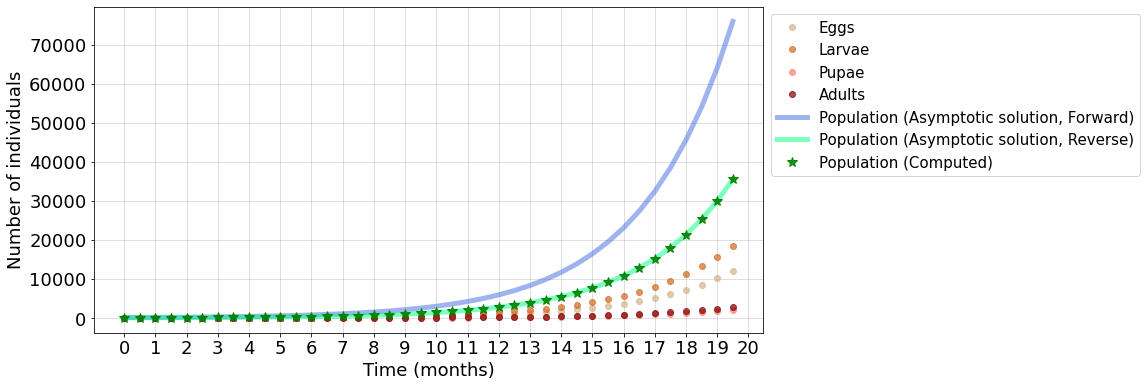

In [7]:
discrete_style = {"linestyle":None, "linewidth":0, "marker":'o', "markersize":6, "alpha":0.7}
labels = ["Eggs", "Larvae", "Pupae", "Adults"]
colors = ['tan', 'chocolate', 'salmon', 'maroon']

fig, ax = plt.subplots(figsize=(12, 6))
for i, state in enumerate(sim_res.T):
    ax.plot(t, state, label=labels[i], color=colors[i], **discrete_style) 

ax.plot(t, pop[0]*np.exp(r*t), label="Population (Asymptotic solution, Forward)", color="royalblue", alpha=0.5)
ax.plot(t, pop[-1]*np.exp(-r*t)[::-1], color='springgreen', label="Population (Asymptotic solution, Reverse)", alpha=0.5)
ax.plot(t, pop, label="Population (Computed)", color='green', marker = '*', markersize = 10,alpha = 0.9, linewidth = 0)

ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
ax.set_xlabel("Time (months)")
ax.set_ylabel("Number of individuals")
ax.grid(alpha = 0.5)

C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


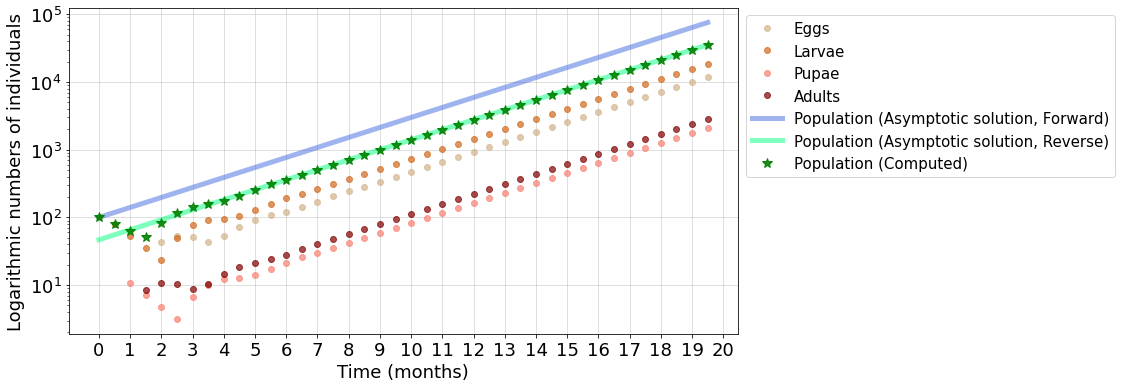

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
for i, state in enumerate(sim_res.T):
    ax.plot(t, state, label=labels[i], color=colors[i], **discrete_style) 

ax.plot(t, pop[0]*np.exp(r*t), label="Population (Asymptotic solution, Forward)", color="royalblue", alpha=0.5)
ax.plot(t, pop[-1]*np.exp(-r*t)[::-1], color='springgreen', label="Population (Asymptotic solution, Reverse)", alpha=0.5)
ax.plot(t, pop, label="Population (Computed)", color='green', marker = '*', markersize = 10,alpha = 0.9, linewidth = 0)

ax.set_yscale('log')
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
ax.set_xlabel("Time (months)")
ax.set_ylabel("Logarithmic numbers of individuals")
ax.grid(alpha = 0.5)

C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


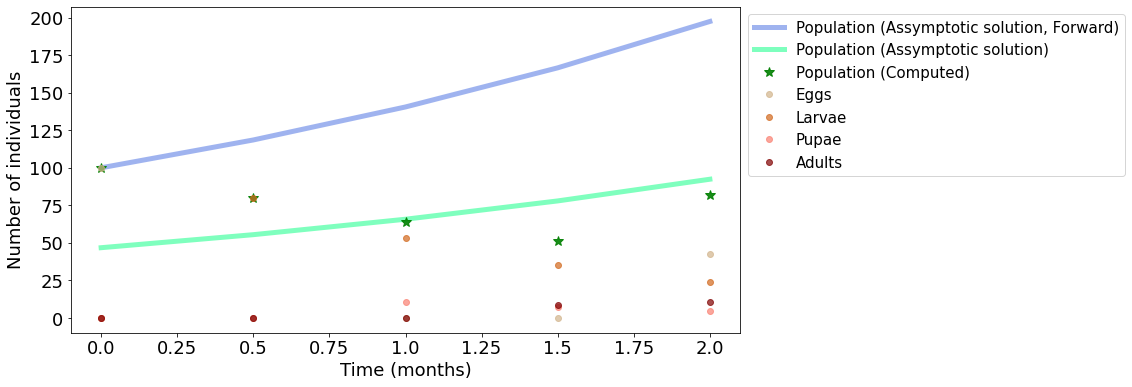

In [9]:
# Zoom in the plot
end_tmp = 5
xx_ticks2 = np.linspace(0, 4, 9)
xx_labels2 = [i/2 for i in xx_ticks2]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(t[:end_tmp], pop[0]*np.exp(r*t)[:end_tmp], label="Population (Assymptotic solution, Forward)", color="royalblue", alpha=0.5)
ax.plot(t[:end_tmp], pop[-1]*np.exp(-r*t)[::-1][:end_tmp], label="Population (Assymptotic solution)", color='springgreen', alpha=0.5)
ax.plot(t[:end_tmp], pop[:end_tmp], label="Population (Computed)",color='green', marker = '*', markersize = 10,alpha = 0.9, linewidth = 0)

for i, state in enumerate(sim_res.T):
    ax.plot(t[:end_tmp], state[:end_tmp], label=labels[i], color=colors[i], **discrete_style)

ax.set_xticks(xx_ticks2)
ax.set_xticklabels(xx_labels2)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Number of individuals")
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 

C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anac

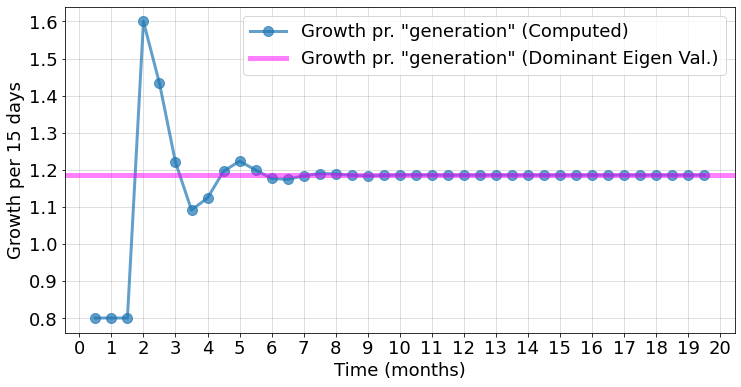

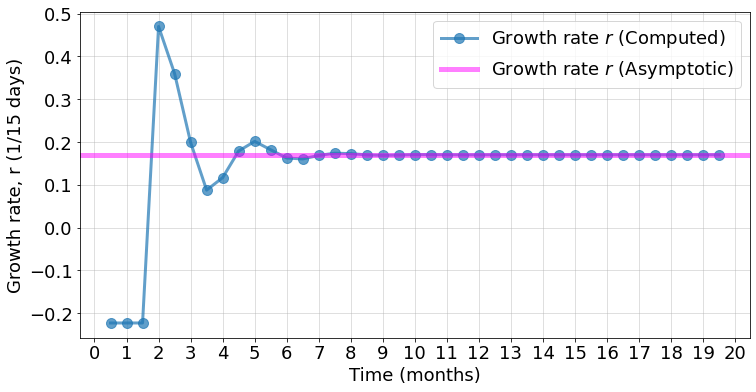

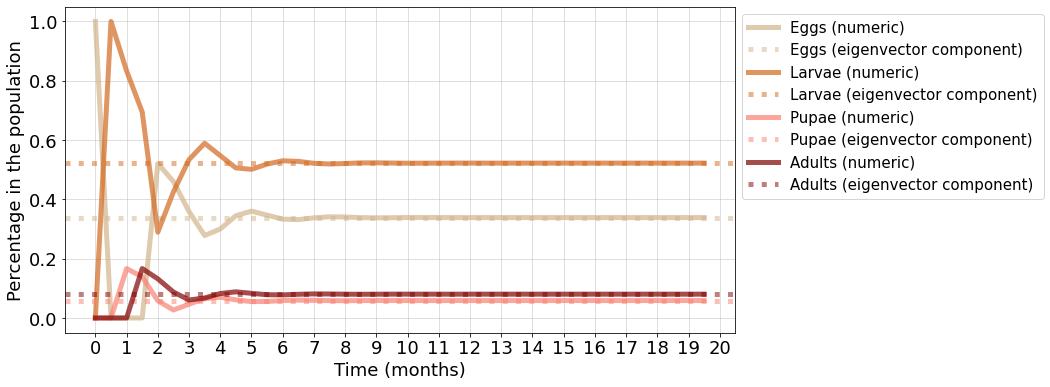

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t[1:], growth, label="Growth pr. \"generation\" (Computed)", alpha=0.7, marker=".", markersize=20, linewidth=3)
ax.axhline(lam_dom, label="Growth pr. \"generation\" (Dominant Eigen Val.)", alpha=0.5, color="magenta")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Growth per 15 days")
ax.grid(alpha = 0.5)


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t[1:], np.log(growth), label="Growth rate $r$ (Computed)", alpha=0.7, marker=".", markersize=20, linewidth=3)
ax.axhline(r, label="Growth rate $r$ (Asymptotic)", alpha=0.5, color="magenta")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Growth rate, r (1/15 days)")
ax.grid(alpha = 0.5)


fig, ax = plt.subplots(figsize=(12, 6))
for i, v in enumerate(vec_dom):
    num_prop = ax.plot(t, np.array(proportions).T[i], color=colors[i], label=labels[i]+" (numeric)", alpha = 0.7)
    ax.axhline(v/sum(vec_dom), alpha=0.5, linestyle=":", color=num_prop[0].get_color(), label=labels[i]+" (eigenvector component)")
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
ax.set_xlabel("Time (months)")
ax.set_ylabel("Percentage in the population")
ax.grid(alpha = 0.5)

# disregard warning, imaginary part is zero...

In [11]:
# Question 3: Density dependence

#This defines the fecundity:
a = 1
# f = lambda N: 25*np.exp(-a*N)
f = lambda N: 25*(1/(1 + a*N))
#...and use this functional dependency in the "next-gen" matrix.
L = lambda N: np.array([
    [0,   0,       0,   f(N)*0.8*1/4], 
    [0.8, 0.8*5/6, 0,   0], 
    [0,   0.8*1/6, 0,   0], 
    [0,   0,       0.8, 0.8*3/4]
])


def time_series_density(n0, t_end=10):
    ret = np.zeros((t_end, len(lams)))
    n = n0
    ret[0] = n0
    for t in range(1, t_end):
        N = np.sum(n)
        n = np.matmul(L(N), n)
        ret[t] = n
    return ret

In [12]:
state_init = np.array([100, 0, 0, 0])
sim_res = time_series_density(state_init, t_end=t_end)
pop = np.sum(sim_res, axis=1)
growth = pop[1:]/pop[:-1]
proportions = np.array([s/np.sum(s) for s in sim_res])

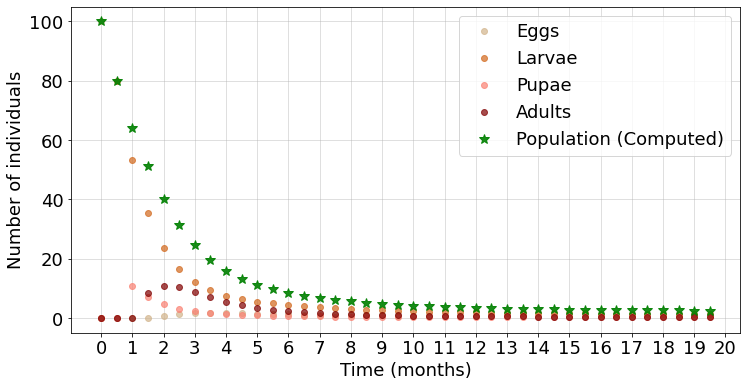

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
for i, state in enumerate(sim_res.T):
    ax.plot(t, state, label=labels[i],color=colors[i], **discrete_style) 

#ax.plot(t, pop[0]*np.exp(r*t), label="Population (Asymptotic solution, Forward)", color="royalblue", alpha=0.5)
#ax.plot(t, pop[-1]*np.exp(-r*t)[::-1], color='springgreen', label="Population (Asymptotic solution, Reverse)", alpha=0.5)
ax.plot(t, pop, label="Population (Computed)", color='green', marker = '*', markersize = 10,alpha = 0.9, linewidth = 0)


# ax.set_yscale("log")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Number of individuals")
ax.grid(alpha = 0.5)

In [14]:
# found the fecundity for eigenvalue=1, that is equilibrium condition.
f_star = (5*0.8-6)*(3*0.8-4)/(0.8**4)
L_star = np.array([
    [0,   0,       0,   f_star*0.8*1/4], 
    [0.8, 0.8*5/6, 0,   0], 
    [0,   0.8*1/6, 0,   0], 
    [0,   0,       0.8, 0.8*3/4]
])

e, v = np.linalg.eig(L_star)
e_dom, v_dom = e[3], v[:,3]

#confinrming the finding:
e_dom, v_dom

((0.9999999999999997+0j),
 array([0.37082847+0.j, 0.88998832+0.j, 0.11866511+0.j, 0.23733022+0.j]))

C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


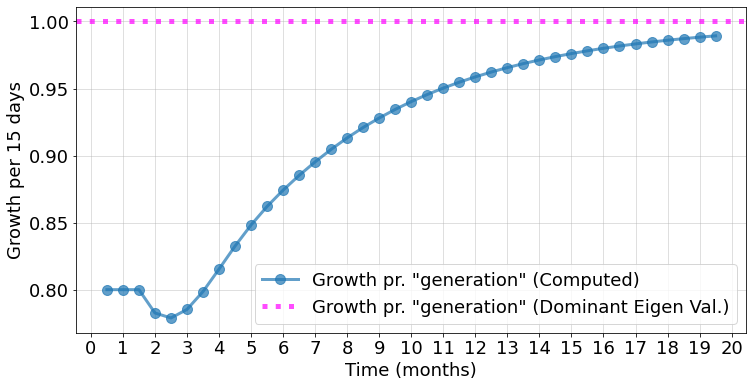

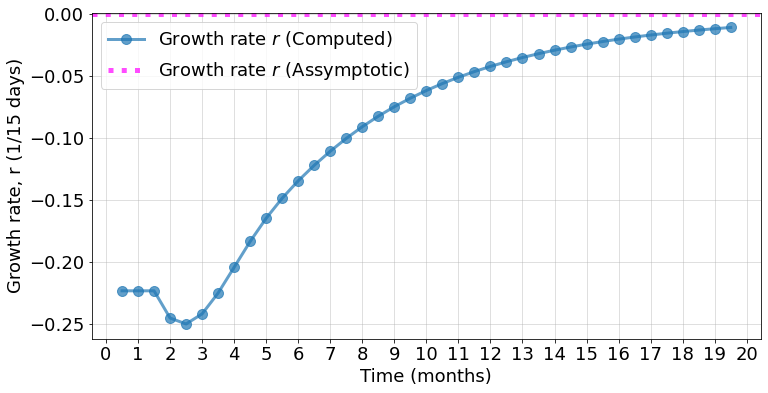

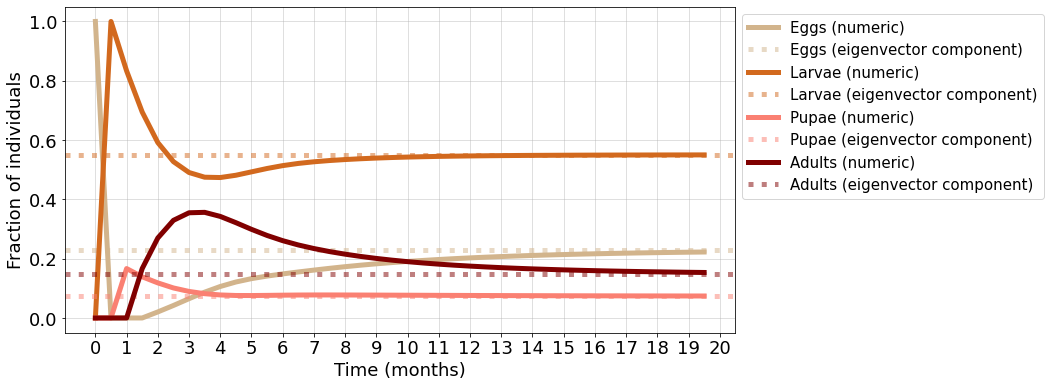

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t[1:], growth, label="Growth pr. \"generation\" (Computed)", alpha=0.7, marker=".", markersize=20, linewidth=3)
ax.axhline(1, label="Growth pr. \"generation\" (Dominant Eigen Val.)", alpha=0.7, linestyle=":", color="magenta")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Growth per 15 days")
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t[1:], np.log(growth), label="Growth rate $r$ (Computed)", alpha=0.7, marker=".", markersize=20, linewidth=3)
ax.axhline(0, label="Growth rate $r$ (Assymptotic)", alpha=0.7, linestyle=":", color="magenta")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Growth rate, r (1/15 days)")
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(figsize=(12, 6))
for i, v in enumerate(v_dom):
    num_prop = ax.plot(t, np.array(proportions).T[i],color=colors[i], label=labels[i]+" (numeric)")
    ax.axhline(v/sum(v_dom), alpha=0.5, linestyle=":", color=num_prop[0].get_color(), label=labels[i]+" (eigenvector component)")

ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Fraction of individuals")
ax.grid(alpha = 0.5)
# Note that we w densiy dependence reach equilibrium!

C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amabog\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


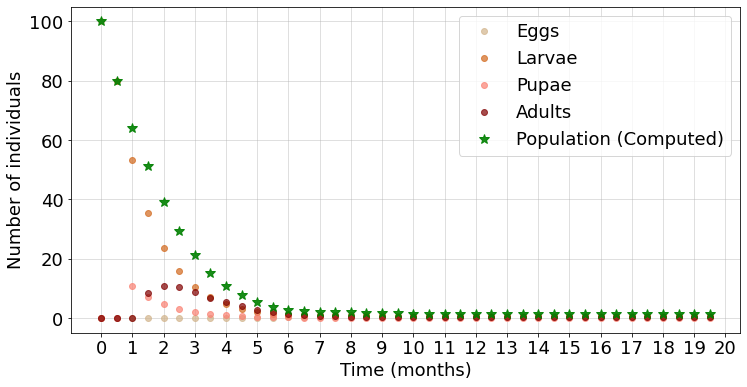

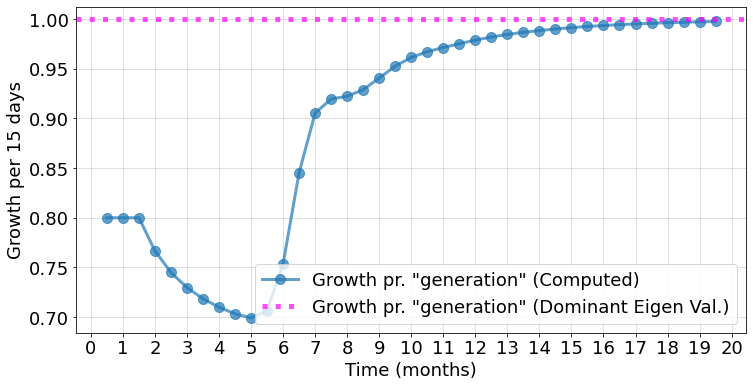

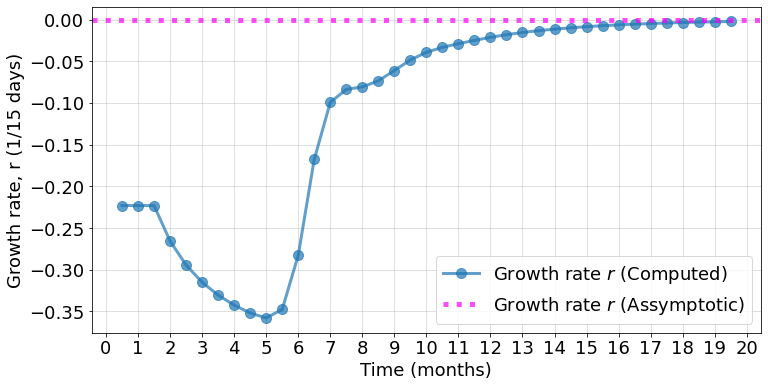

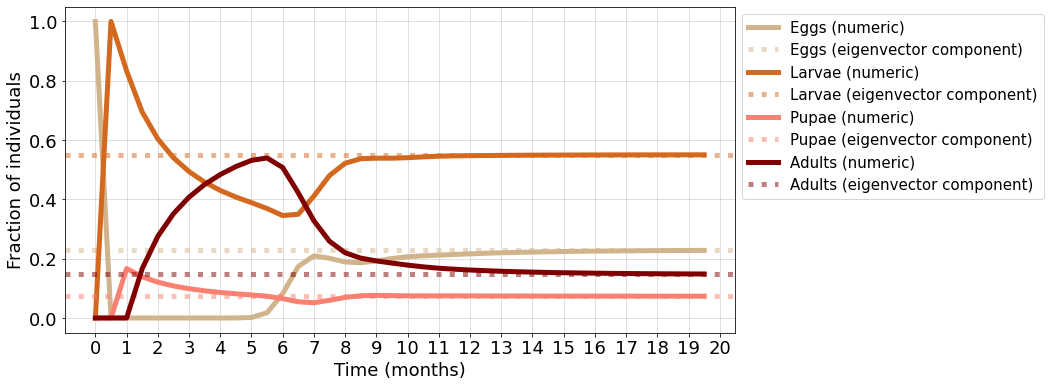

In [16]:
# Question 3: Density dependence

#This defines the fecundity:
a = 1
f = lambda N: 25*np.exp(-a*N)
# f = lambda N: 25*(1/(1 + a*N))
#...and use this functional dependency in the "next-gen" matrix.
L = lambda N: np.array([
    [0,   0,       0,   f(N)*0.8*1/4], 
    [0.8, 0.8*5/6, 0,   0], 
    [0,   0.8*1/6, 0,   0], 
    [0,   0,       0.8, 0.8*3/4]
])


def time_series_density(n0, t_end=10):
    ret = np.zeros((t_end, len(lams)))
    n = n0
    ret[0] = n0
    for t in range(1, t_end):
        N = np.sum(n)
        n = np.matmul(L(N), n)
        ret[t] = n
    return ret

state_init = np.array([100, 0, 0, 0])
sim_res = time_series_density(state_init, t_end=t_end)
pop = np.sum(sim_res, axis=1)
growth = pop[1:]/pop[:-1]
proportions = np.array([s/np.sum(s) for s in sim_res])



fig, ax = plt.subplots(figsize=(12, 6))
for i, state in enumerate(sim_res.T):
    ax.plot(t, state, label=labels[i],color=colors[i], **discrete_style) 
ax.plot(t, pop, label="Population (Computed)", color='green', marker = '*', markersize = 10,alpha = 0.9, linewidth = 0)

# ax.set_yscale("log")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Number of individuals")
ax.grid(alpha = 0.5)

# found the fecundity for eigenvalue=1, that is equilibrium condition.
f_star = (5*0.8-6)*(3*0.8-4)/(0.8**4)
L_star = np.array([
    [0,   0,       0,   f_star*0.8*1/4], 
    [0.8, 0.8*5/6, 0,   0], 
    [0,   0.8*1/6, 0,   0], 
    [0,   0,       0.8, 0.8*3/4]
])

e, v = np.linalg.eig(L_star)
e_dom, v_dom = e[3], v[:,3]

#confinrming the finding:
e_dom, v_dom

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t[1:], growth, label="Growth pr. \"generation\" (Computed)", alpha=0.7, marker=".", markersize=20, linewidth=3)
ax.axhline(1, label="Growth pr. \"generation\" (Dominant Eigen Val.)", alpha=0.7, linestyle=":", color="magenta")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Growth per 15 days")
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t[1:], np.log(growth), label="Growth rate $r$ (Computed)", alpha=0.7, marker=".", markersize=20, linewidth=3)
ax.axhline(0, label="Growth rate $r$ (Assymptotic)", alpha=0.7, linestyle=":", color="magenta")
ax.legend()
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Growth rate, r (1/15 days)")
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(figsize=(12, 6))
for i, v in enumerate(v_dom):
    num_prop = ax.plot(t, np.array(proportions).T[i],color=colors[i], label=labels[i]+" (numeric)")
    ax.axhline(v/sum(v_dom), alpha=0.5, linestyle=":", color=num_prop[0].get_color(), label=labels[i]+" (eigenvector component)")

ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
ax.set_xticks(xx_ticks)
ax.set_xticklabels(xx_labels)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Fraction of individuals")
ax.grid(alpha = 0.5)
# Note that we w densiy dependence reach equilibrium!

In [ ]:
# Currently not used...

#V = vecs.T
#Vi = np.linalg.inv(V)
#print("V:")
#print(V)
#print("Vi:")
#print(Vi)

# evolve = lambda steps=1: V@np.diag([l**steps for l in lams])@Vi
# [matmul(evolve(i), n0) for i in range()]




# use this to plot analytical solutions:
#inits = [c[-1]*np.exp(-r*t)[-1] for c in sim_res.T]
#for i, c in enumerate(sim_res.T):
#    ax.plot(t, inits[i]*np.exp(r*t), label="", alpha=0.5)